# Prepare a prediction model for a profit of 50_startups data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("50_Startups (1).csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [10]:
df=pd.get_dummies(df,columns=["State"])

In [11]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [12]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


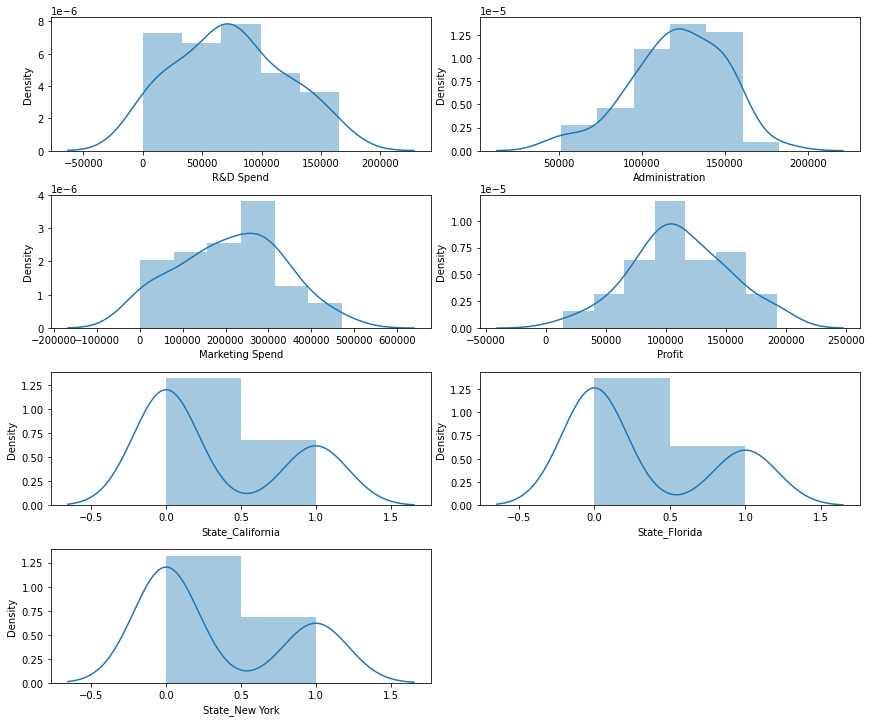

In [13]:
plt.figure(figsize=(12,12))
count=1
for i in df:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [14]:
cols=["R&D Spend","Administration","Marketing Spend","Profit"]

In [15]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()

scaled_cols=scalar.fit_transform(df[cols])
scaled_cols=pd.DataFrame(scaled_cols,columns=cols)

In [16]:
for col in cols:
    df[col]=scaled_cols[col]

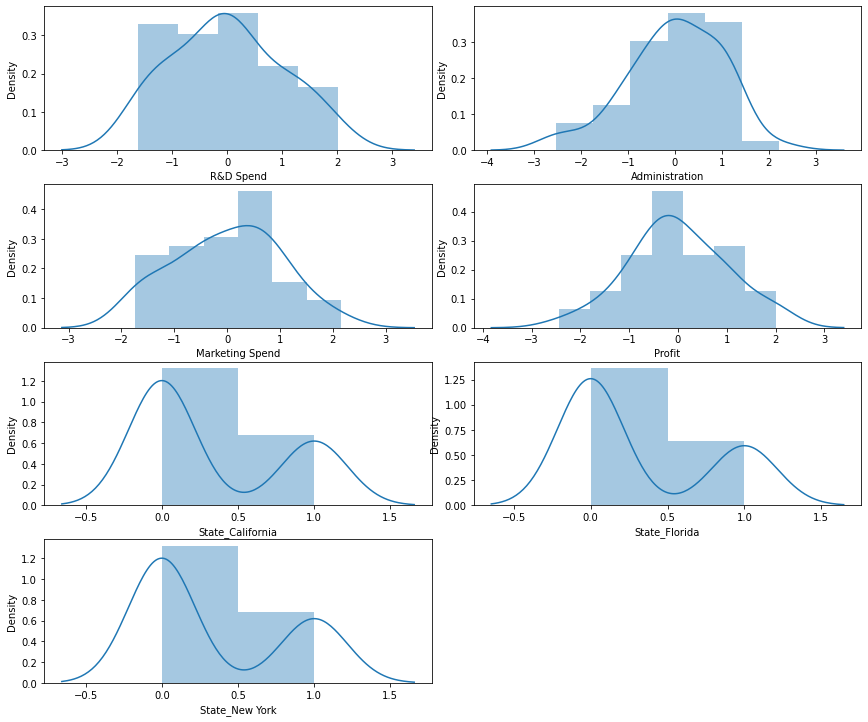

In [17]:
plt.figure(figsize=(12,12))
count=1
for i in df:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [19]:
df["PROFIT"]=df["Profit"]

In [20]:
df.drop(['Profit'],axis=1,inplace=True)

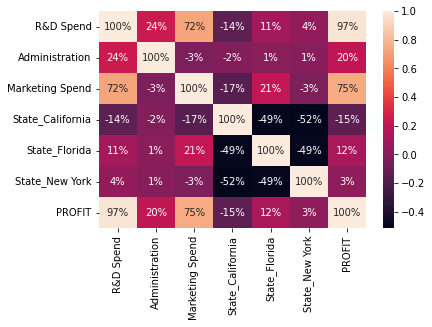

In [21]:
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [12]:
#We can see R&D spending AND Marketing spend is strongly corealted to our target variable.

In [13]:
#separating features and target variable

In [73]:
X=df[["R&D Spend","Marketing Spend"]]

In [74]:
#X=df.iloc[:,:-1]

In [75]:
Y=df.iloc[:,-1]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=76)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg=LinearRegression()

In [80]:
reg.fit(X_train,Y_train)

LinearRegression()

In [81]:
Y_pred_train=reg.predict(X_train)
Y_pred_test=reg.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:", round(np.sqrt(mean_squared_error(Y_train,Y_pred_train)),2))
print("R2 Score:",round(r2_score(Y_train,Y_pred_train),2))
print("Test Data")
print("RMSE:", round(np.sqrt(mean_squared_error(Y_test,Y_pred_test)),2))
print("R2 Score:",round(r2_score(Y_test,Y_pred_test),2))

Train Data
RMSE: 0.19
R2 Score: 0.96
Test Data
RMSE: 0.32
R2 Score: 0.87


In [83]:
from sklearn.linear_model import Ridge,Lasso

In [84]:
def metrics(Y_actual,Y_pred):
    r2=r2_score(Y_actual,Y_pred)
    RMSE=np.sqrt(mean_squared_error(Y_actual,Y_pred))
    print("R2 Score: {}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [89]:
l1=Ridge(10)
l1.fit(X_train,Y_train)

Ridge(alpha=10)

In [90]:
y_pred_train=l1.predict(X_train)
y_pred_test=l1.predict(X_test)

In [91]:
print("Training performance")
metrics(Y_train,y_pred_train)
print("Testing performnance")
metrics(Y_test,y_pred_test)

Training performance
R2 Score: 0.92|RMSE:0.27
Testing performnance
R2 Score: 0.8|RMSE:0.39


In [92]:
from sklearn.model_selection import cross_val_score
reg_cv=cross_val_score(reg,X,Y,cv=5)
reg_cv

array([ 0.89408981, -0.82131719, -0.4962757 , -0.76487252,  0.4466983 ])